https://www.kaggle.com/anokas/quora-question-pairs/data-analysis-xgboost-starter-0-35460-lb
この記事を参考にする

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette() #the list of rgb tuples

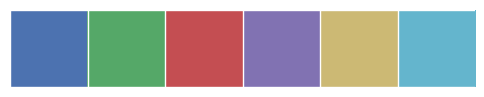

In [2]:
sns.palplot(pal)

In [3]:
print('# File sizes')
for f in os.listdir('../Quora_Question_pairs_data'): #ディレクトリ内のファイルのリスト(str)
    if 'zip' not in f:
        #str.ljust(n):leftサイドに空白、文字列がn文字になるように調整する
        #os.path.getsize(path名):当該ファイルのバイト数を返す
        print(f.ljust(30) + str(round(os.path.getsize('../Quora_Question_pairs_data/' + f) / 1000000,2)) + 'MB')
        

# File sizes
train.csv                     63.0MB
test.csv                      314.0MB


In [4]:
df_train = pd.read_csv('../Quora_Question_pairs_data/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train.is_duplicate.mean()*100,2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(qids.unique())))
print('Number of questions that appea multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appea multiple times: 111780


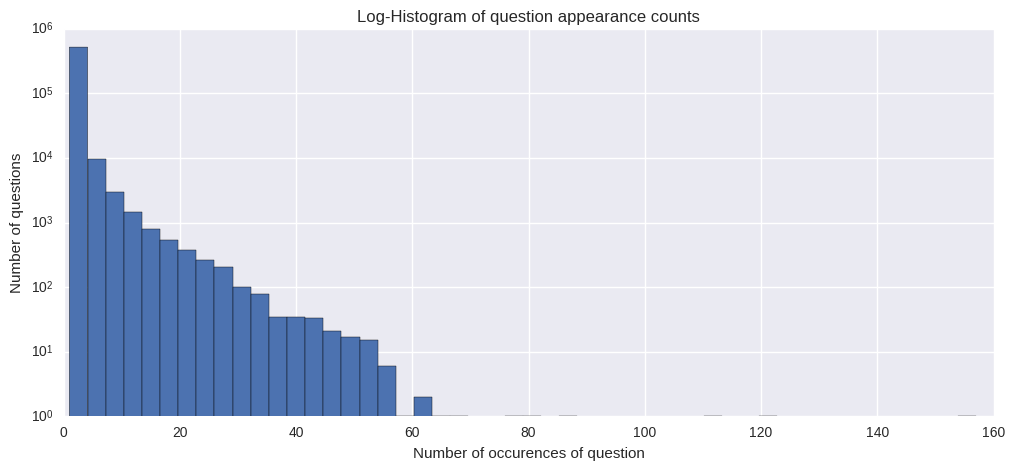

In [6]:
fro

# Test submission

In [7]:
from sklearn.metrics import log_loss #log-loss
p = df_train['is_duplicate'].mean() #予測確率（平均値）
#全ての予測値が、平均値の時の損失関数の値
print('Predicted score: {}'.format(log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)))

df_test = pd.read_csv('../Quora_Question_pairs_data/test.csv')
sub = pd.DataFrame({'test_id' : df_test['test_id'],'is_duplicate':p})
sub.to_csv('naive_submission.csv',index=False)
sub.head()

Predicted score: 0.658527383984


,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


# Test set

In [8]:
df_test = pd.read_csv('../Quora_Question_pairs_data/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [9]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


# Text analysis

In [10]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

mean-train 59.86 std-train 31.99 mean-test 60.11 std-test 31.66 max-train 1169.00 max-test 1176.00


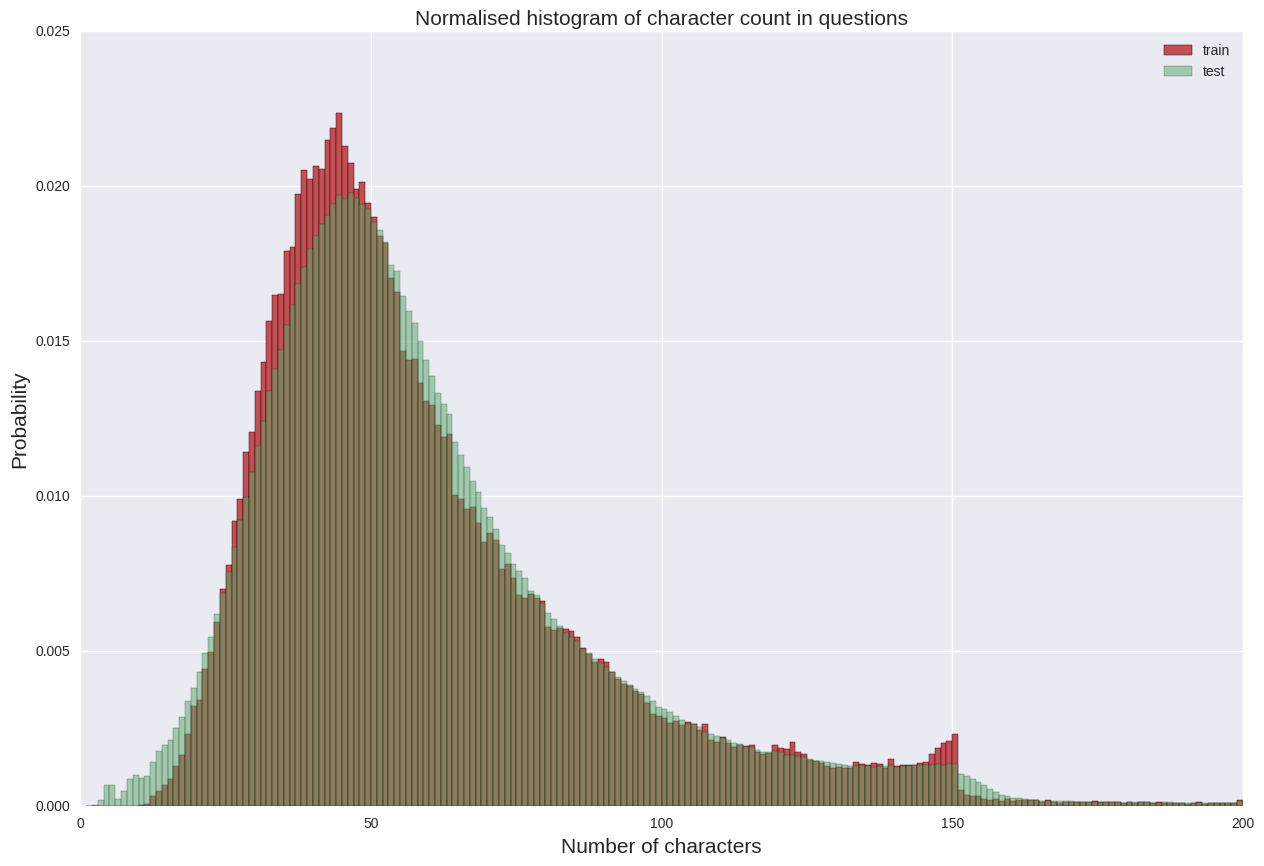

In [16]:
dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15,10))
plt.hist(dist_train,bins=200,range=[0,200],color=pal[2],normed=True,label='train') #rangeで範囲を指定できる
plt.hist(dist_test,bins=200,range=[0,200],color=pal[1],normed=True,alpha=0.5,label='test')
plt.title('Normalised histogram of character count in questions',fontsize=15)
plt.legend()
plt.xlabel('Number of characters',fontsize=15)
plt.ylabel('Probability',fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'
      .format(dist_train.mean(),dist_train.std(),dist_test.mean(),dist_test.std(),dist_train.max(),dist_test.max()))


mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


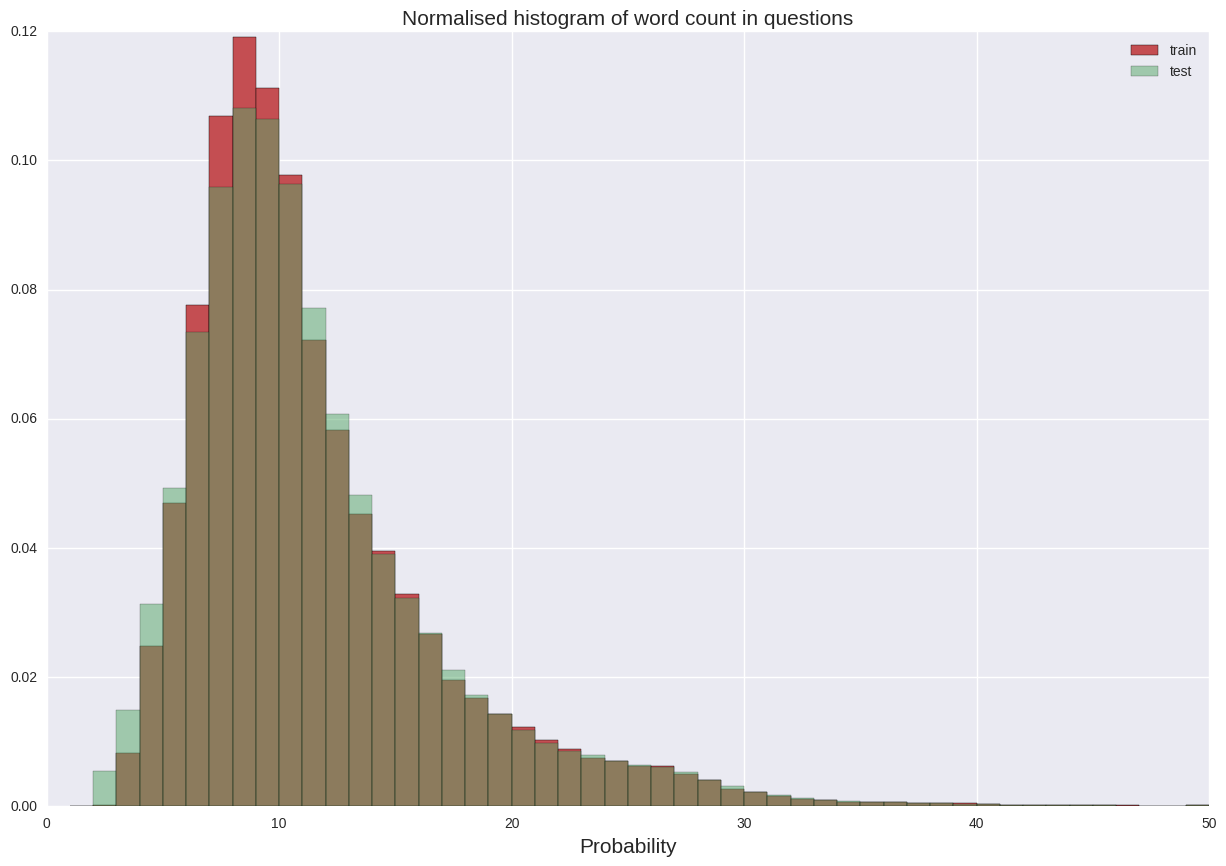

In [21]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(dist_train,bins=50,range=[0,50],color=pal[2],normed=True,label='train')
plt.hist(dist_test,bins=50,range=[0,50],color=pal[1],normed=True,alpha=0.5,label='test')
plt.title('Normalised histogram of word count in questions',fontsize=15)
plt.legend()
plt.xlabel('Number of words',fontsize=15)
plt.xlabel('Probability',fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [22]:
from wordcloud import WordCloud

ImportError: No module named wordcloud